In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# Load Dataset
data = pd.read_csv('/Users/kajalsharma/Downloads/Airline_customer_satisfaction 3.csv')


In [8]:
# Data Cleaning and Preprocessing
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
data['Class'] = label_encoder.fit_transform(data['Class'])

In [10]:
# Impute missing values in "Arrival Delay in Minutes" using the median
imputer = SimpleImputer(strategy='median')
data['Arrival Delay in Minutes'] = imputer.fit_transform(data[['Arrival Delay in Minutes']])


In [12]:
# Separate features and target
X = data.drop(columns='satisfaction')
y = data['satisfaction']

In [14]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define a function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Model accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'])

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Confusion Matrix:\n{conf_matrix}")
    print(f"{model_name} Classification Report:\n{report}\n")
    
    return model, accuracy, conf_matrix

In [22]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg_model, log_reg_accuracy, log_reg_conf_matrix = evaluate_model(log_reg, "Logistic Regression")

# Extract and display the top 10 features from Logistic Regression
log_reg_importance = np.abs(log_reg.coef_[0])
top_10_log_reg_features = X.columns[np.argsort(log_reg_importance)[-10:][::-1]]
print("Top 10 features according to Logistic Regression:", top_10_log_reg_features)


Logistic Regression Accuracy: 0.8258
Logistic Regression Confusion Matrix:
[[ 9425  2250]
 [ 2276 12025]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.81      0.81      0.81     11675
   Satisfied       0.84      0.84      0.84     14301

    accuracy                           0.83     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.83      0.83      0.83     25976


Top 10 features according to Logistic Regression: Index(['Inflight entertainment', 'Customer Type', 'Type of Travel',
       'On-board service', 'Seat comfort', 'Checkin service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Leg room service', 'Food and drink'],
      dtype='object')


In [24]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_model, dt_accuracy, dt_conf_matrix = evaluate_model(decision_tree, "Decision Tree")

# Extract and display the top 10 features from Decision Tree
dt_importance = decision_tree.feature_importances_
top_10_dt_features = X.columns[np.argsort(dt_importance)[-10:][::-1]]
print("Top 10 features according to Decision Tree:", top_10_dt_features)


Decision Tree Accuracy: 0.9355
Decision Tree Confusion Matrix:
[[10796   879]
 [  797 13504]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.93      0.92      0.93     11675
   Satisfied       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.94      0.94      0.94     25976


Top 10 features according to Decision Tree: Index(['Inflight entertainment', 'Seat comfort', 'Ease of Online booking',
       'Customer Type', 'Flight Distance', 'Gate location', 'Age',
       'Departure/Arrival time convenient', 'Type of Travel', 'Class'],
      dtype='object')


In [28]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
rf_model, rf_accuracy, rf_conf_matrix = evaluate_model(random_forest, "Random Forest")

# Extract and display the top 10 features from Random Forest
rf_importance = random_forest.feature_importances_
top_10_rf_features = X.columns[np.argsort(rf_importance)[-10:][::-1]]
print("Top 10 features according to Random Forest:", top_10_rf_features)

Random Forest Accuracy: 0.9563
Random Forest Confusion Matrix:
[[11249   426]
 [  710 13591]]
Random Forest Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.94      0.96      0.95     11675
   Satisfied       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


Top 10 features according to Random Forest: Index(['Inflight entertainment', 'Seat comfort', 'Ease of Online booking',
       'Online support', 'Leg room service', 'On-board service',
       'Flight Distance', 'Food and drink', 'Customer Type', 'Class'],
      dtype='object')


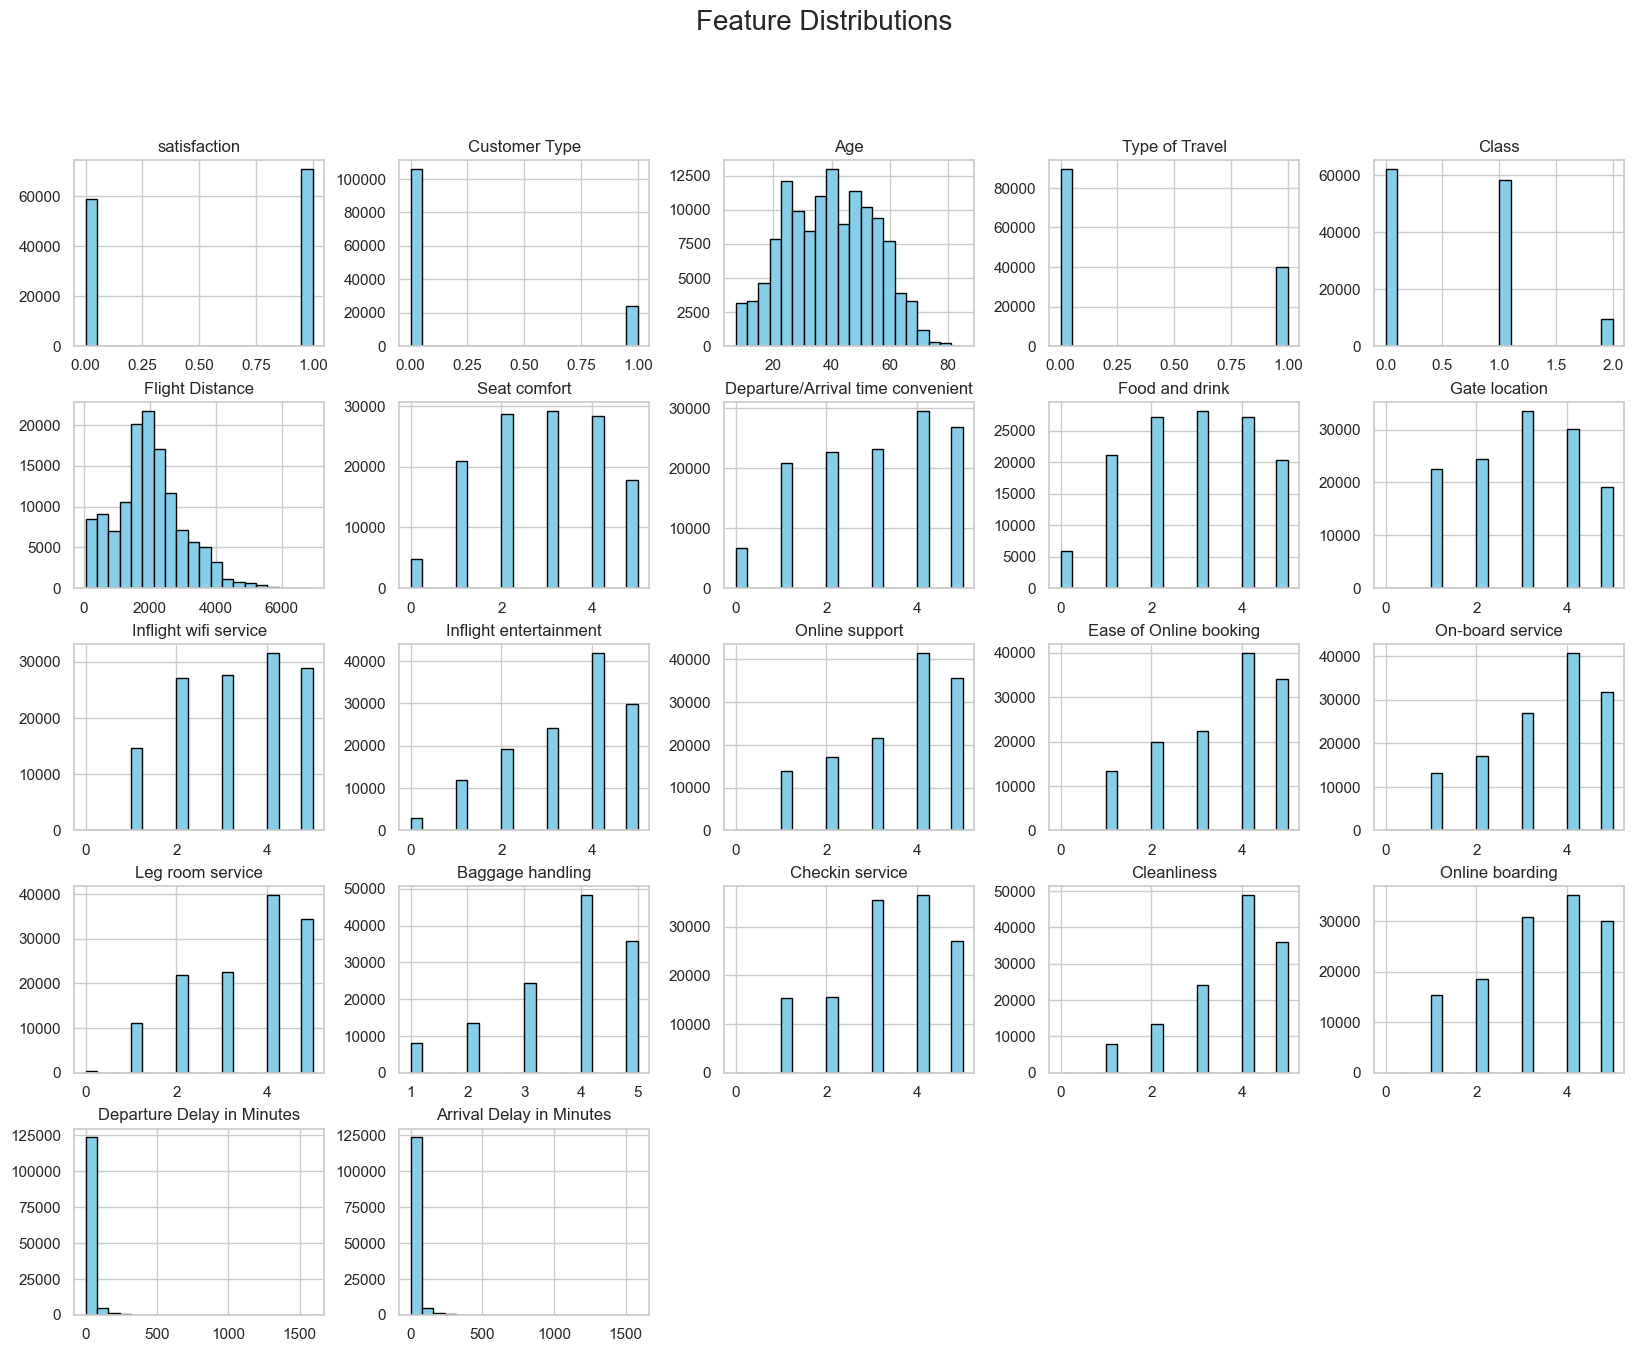

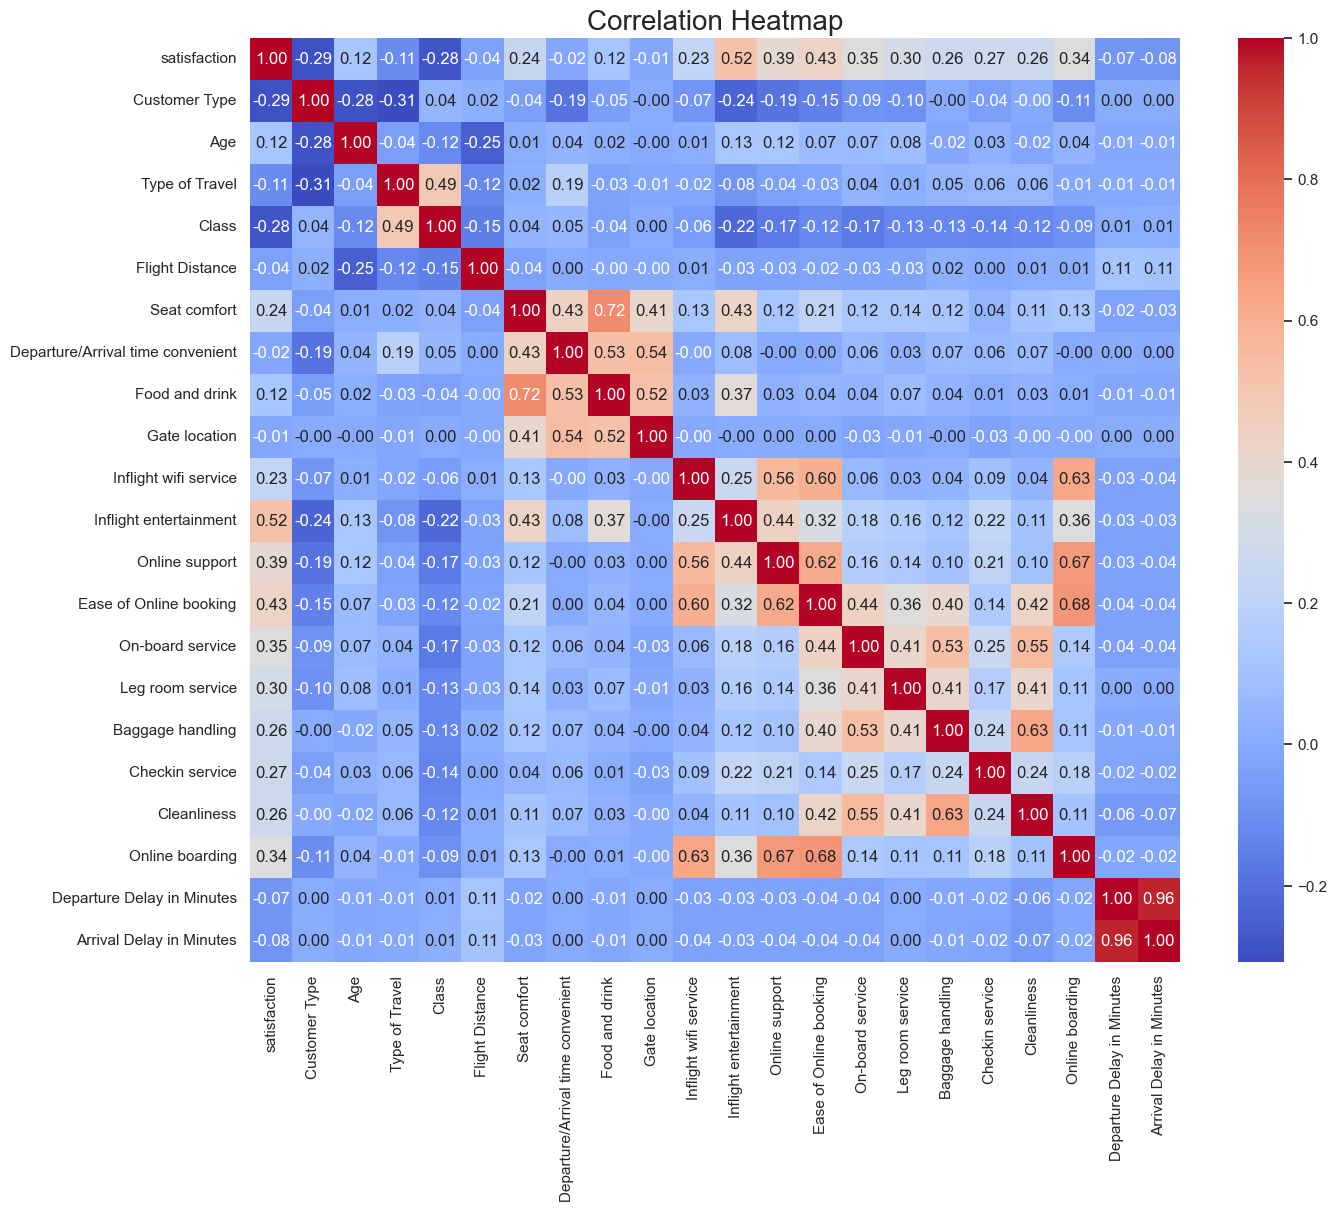

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histograms for all features
data.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()


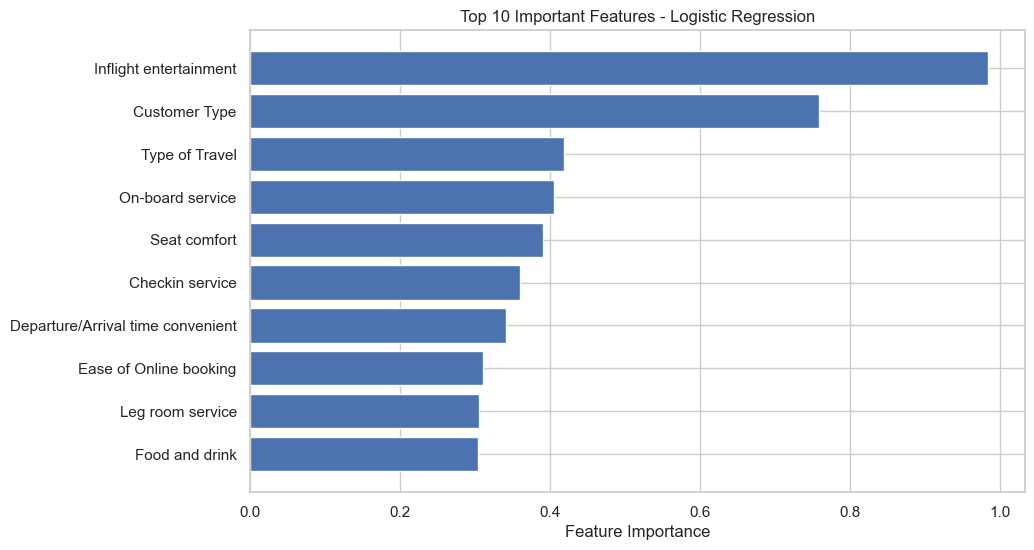

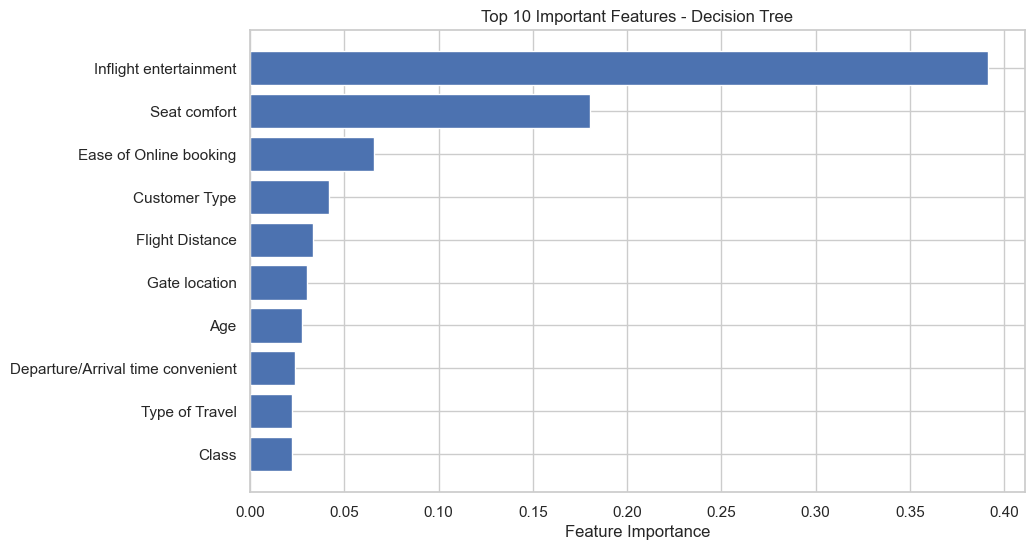

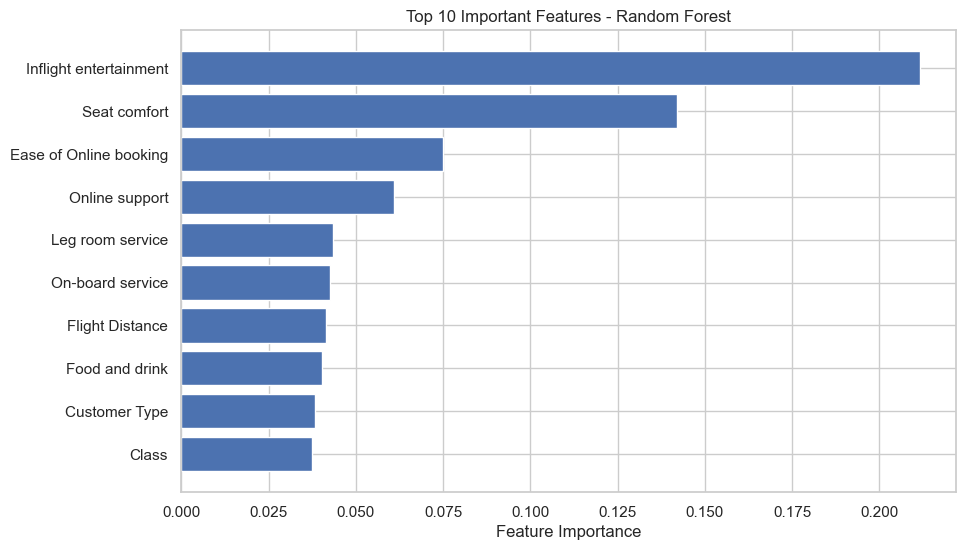

In [32]:
def plot_feature_importance(feature_importances, feature_names, model_name):
    # Sort features by importance
    sorted_idx = np.argsort(feature_importances)[-10:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Top 10 Important Features - {model_name}")
    plt.show()

# Logistic Regression Feature Importance
plot_feature_importance(np.abs(log_reg.coef_[0]), X.columns, "Logistic Regression")

# Decision Tree Feature Importance
plot_feature_importance(decision_tree.feature_importances_, X.columns, "Decision Tree")

# Random Forest Feature Importance
plot_feature_importance(random_forest.feature_importances_, X.columns, "Random Forest")


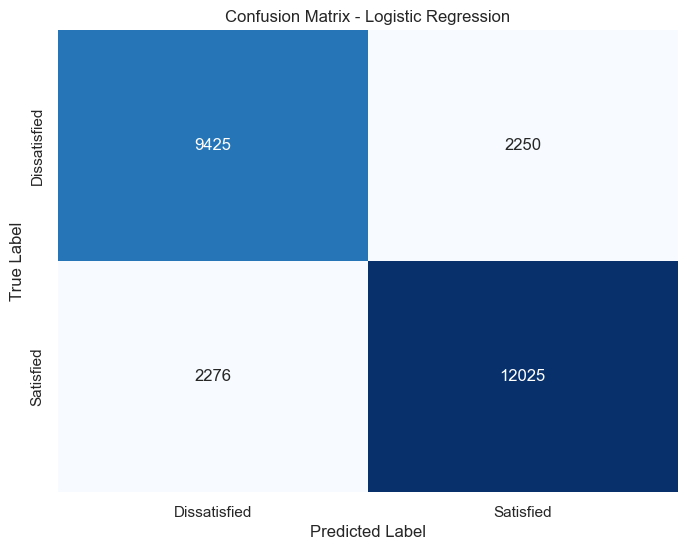

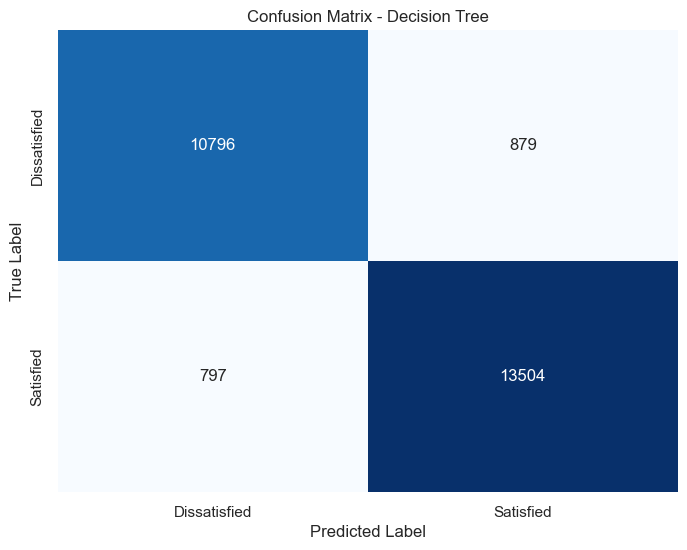

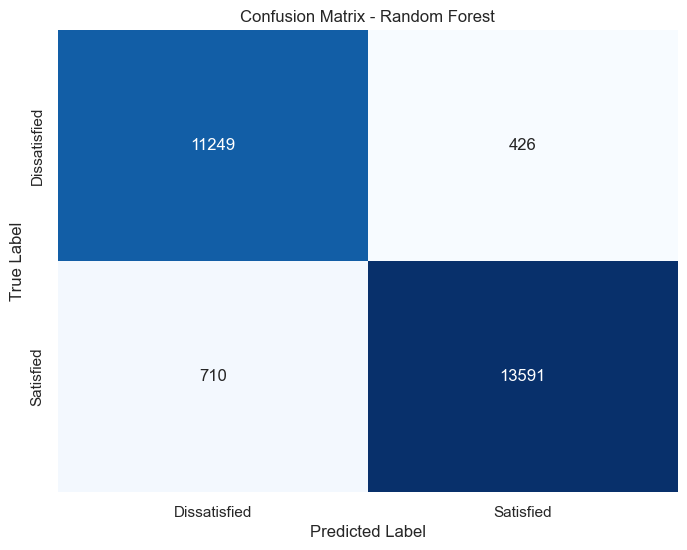

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Dissatisfied', 'Satisfied'],
                yticklabels=['Dissatisfied', 'Satisfied'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(log_reg_conf_matrix, "Logistic Regression")
plot_confusion_matrix(dt_conf_matrix, "Decision Tree")
plot_confusion_matrix(rf_conf_matrix, "Random Forest")


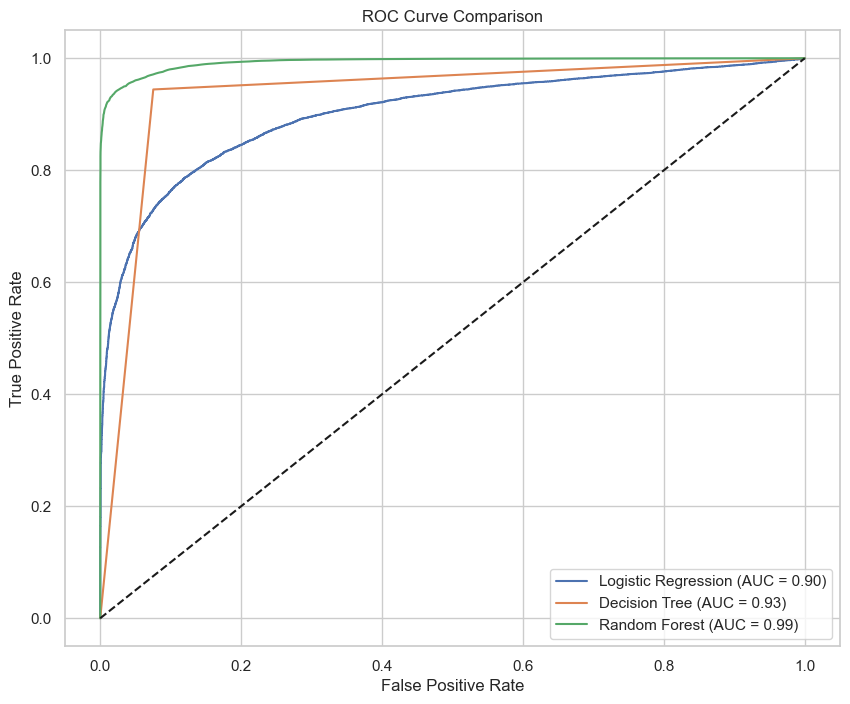

In [36]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model, name in zip(models, model_names):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for Logistic Regression, Decision Tree, and Random Forest
plot_roc_curve([log_reg, decision_tree, random_forest], 
               ["Logistic Regression", "Decision Tree", "Random Forest"], 
               X_test_scaled, y_test)


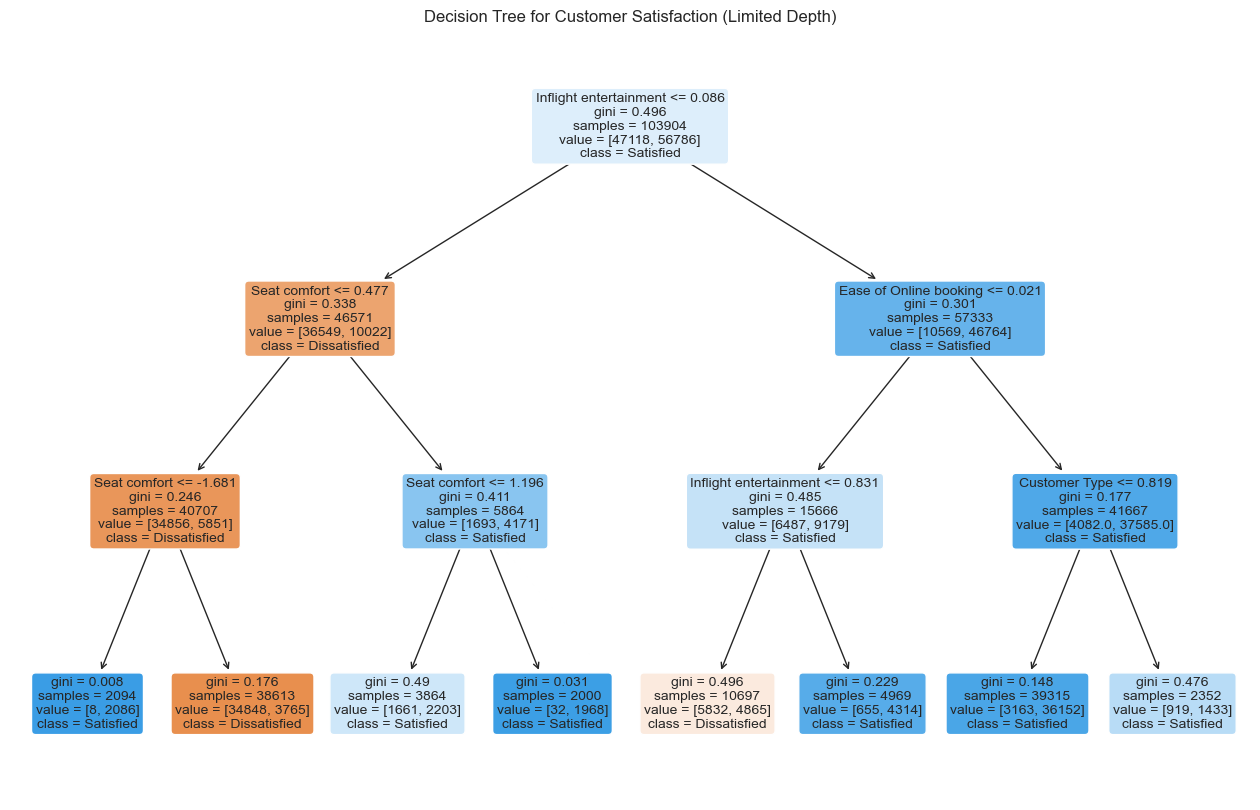

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree with limited depth for visualization
decision_tree_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_viz.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(decision_tree_viz, feature_names=X.columns, class_names=['Dissatisfied', 'Satisfied'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Customer Satisfaction (Limited Depth)")
plt.show()
